In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from IPython.display import display
import cv2 # is used for to perform task on images
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# make variable and store it in the variable
with_mask = os.listdir('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask')
without_mask = os.listdir('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/without_mask')

In [3]:
print(with_mask[0:5])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']


In [4]:
print(without_mask[-5:])

['without_mask_2870.jpg', 'without_mask_2858.jpg', 'without_mask_2680.jpg', 'without_mask_1389.jpg', 'without_mask_2694.jpg']


In [5]:
print("image with mask : ", len(with_mask))
print("image without mask : ", len(without_mask))

image with mask :  3726
image without mask :  3829


In [6]:
#creating labels (with mask = 1, without mask = 0)

with_mask_label = [1]*3725
without_mask_label = [0]*3828

In [7]:
print(with_mask_label[0:5])

[1, 1, 1, 1, 1]


In [8]:
labels = with_mask_label + without_mask_label

In [9]:
print(len(labels))

7553


In [10]:
#display image

img = mpimg.imread('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask/with_mask_2140.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

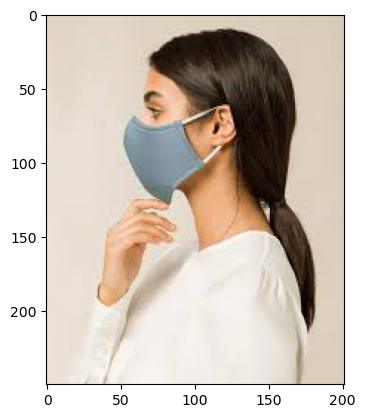

In [11]:
imgplot = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

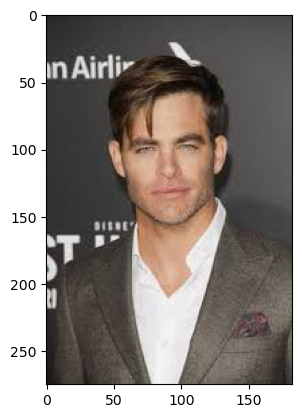

In [12]:
#display image

img = mpimg.imread('/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/without_mask/without_mask_2870.jpg')
imgplot = plt.imshow(img)
plt.show

In [13]:
#image processing
# 1. resize images , 2. convert images to numpy array

In [14]:
from PIL import Image
import numpy as np
import os

with_mask_path = '/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/with_mask/'
with_mask = os.listdir(with_mask_path)

data = []

for img_file in with_mask:
    img_path = os.path.join(with_mask_path, img_file)

    # Skip directories
    if os.path.isfile(img_path):
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

without_mask_path = '/Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/data/without_mask/'
without_mask = os.listdir(without_mask_path)

for img_file in without_mask:
    img_path = os.path.join(without_mask_path, img_file)

    # Skip directories
    if os.path.isfile(img_path):
        image = Image.open(img_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)


/Users/kamakshiojha/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(data)

7553

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
# to convert image and label lists to numpy array

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
print(X.shape)

(7553, 128, 128, 3)


In [24]:
Y_new = tf.keras.utils.to_categorical(Y, num_classes=2)
Y_new = tf.cast(Y_new, dtype='float32')


In [25]:
print(Y_new)

tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(7553, 2), dtype=float32)


In [30]:
#split the data into training and testing
# X_np = X.numpy()
Y_new_np = Y_new.numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_new_np, test_size=0.2, random_state=2)


In [31]:
print(X_train.shape,X_test.shape ,Y_train.shape ,Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042, 2) (1511, 2)


In [32]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

#scaling is done to range values in/btw 0 - 1 instead of 0 - 255
#black  = 0, 1 = white

In [33]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[219, 221, 233],
        [219, 221, 233],
        [218, 220, 232],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]],

       [[217, 219, 231],
        [217, 219, 231],
        [216, 218, 230],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]],

       [[216, 218, 230],
        [216, 218, 230],
        [215, 217, 229],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]]

In [34]:
print(X_train_scaled[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.85882353 0.86666667 0.91372549]
  [0.85882353 0.86666667 0.91372549]
  [0.85490196 0.8627451  0.90980392]
  ...
  [0.95294118 0.96470588 1.        ]
  [0.95294118 0.96470588 1.        ]
  [0.95294118 0.96470588 1.        ]]

 [[0.85098039 0.85882353 0.90588235]
  [0.85098039 0.85882353 0.90588235]


In [35]:
#building CCN

import tensorflow as tf
from tensorflow import keras

In [32]:
# tensorflow and pytorch are the two libraries for building a model
# tensorflow library was developed by google and keras is just a wrapper for this library
# pytorch is developed by facebook

In [46]:
num_of_class = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape = (128,128,3) ))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(128, kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())  #single dimensional data

#Dense layers:
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))#no overfitting arises

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation = 'sigmoid')) 
#sigmoid is used in binary class classification
#softmax is used for multiclass classification

In [47]:
# #compile the model
# model.compile(
#     optimizer = 'adam',
#     loss = 'catergorical_crossentropy',#for classification
#     metrics = ['acc']
# )

from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
model.summary()

# Train the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,042 (12.65 MB)

 Trainable params: 3,315,042 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 176ms/step - accuracy: 0.6651 - loss: 0.5984 - val_accuracy: 0.8595 - val_loss: 0.3274
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.8776 - loss: 0.3252 - val_accuracy: 0.8727 - val_loss: 0.3105
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 33s 191ms/step - accuracy: 0.8886 - loss: 0.2826 - val_accuracy: 0.8876 - val_loss: 0.2504
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 199ms/step - accuracy: 0.9074 - loss: 0.2408 - val_accuracy: 0.9107 - val_loss: 0.2127
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.9164 - loss: 0.2126 - val_accuracy: 0.9107 - val_loss: 0.2092


In [49]:
print(history.history)

{'accuracy': [0.764208197593689, 0.8723560571670532, 0.8946110010147095, 0.9117160439491272, 0.9163141250610352], 'loss': [0.4871961176395416, 0.3325442373752594, 0.2752091884613037, 0.23344415426254272, 0.21639384329319], 'val_accuracy': [0.8595041036605835, 0.8727272748947144, 0.8876032829284668, 0.910743772983551, 0.910743772983551], 'val_loss': [0.32736101746559143, 0.3104898929595947, 0.2504477798938751, 0.21273905038833618, 0.20918117463588715]}


In [50]:
#model evaluation


loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print("Accuracy" , accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9385 - loss: 0.1632
Accuracy 0.9364659190177917


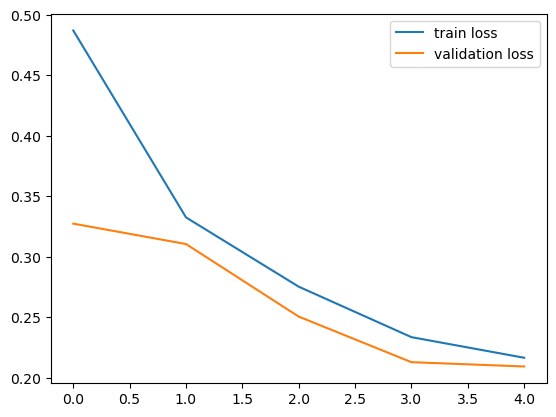

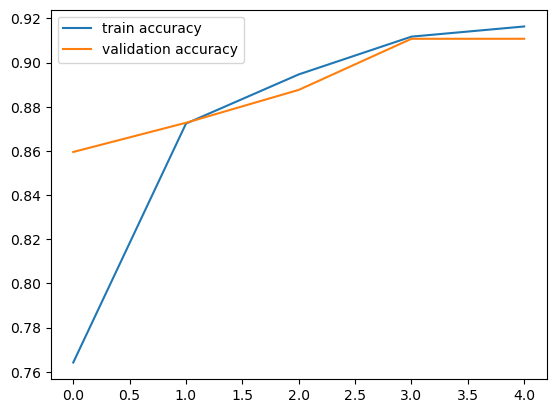

In [51]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/Test/image2.jpg


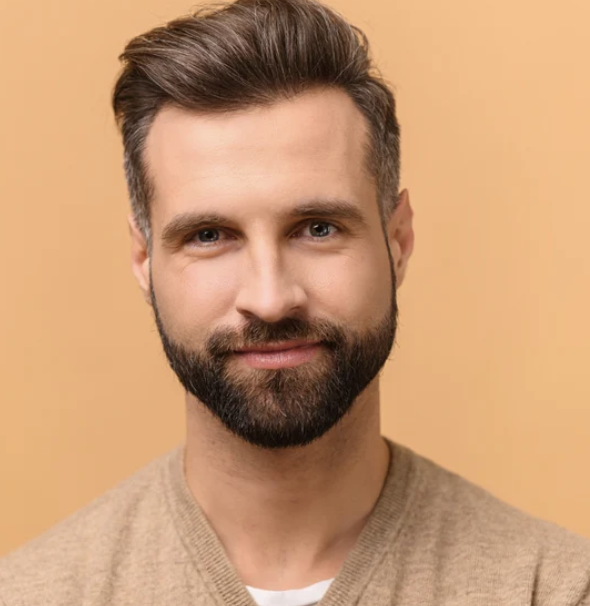

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Model Output Probabilities: [[0.42644283 0.88045555]]
Predicted Class Label: 1
The person in the image is not wearing a mask


In [53]:
import cv2
from PIL import Image
import numpy as np
import tensorflow as tf


input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
if input_image is None:
    raise ValueError(f"Failed to load the image at {input_image_path}. Please check the file path and file format.")

image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image_rgb))

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_predict = model.predict(input_image_reshaped)
print("Model Output Probabilities:", input_predict)

input_predict_label = np.argmax(input_predict)
print("Predicted Class Label:", input_predict_label)

threshold = 0.5 
if input_predict[0][1] > threshold: 
    print('The person in the image is not wearing a mask')  
else:
    print('The person in the image is wearing a mask') 


Path of the image to be predicted: /Users/kamakshiojha/Documents/Machine_Learning_projects/Mask_Detection/Test/image3.jpg


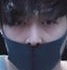

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Model Output Probabilities: [[0.57293606 0.33142278]]
Predicted Class Label: 0
The person in the image is wearing a mask


In [54]:

import cv2
from PIL import Image
import numpy as np
import tensorflow as tf


input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
if input_image is None:
    raise ValueError(f"Failed to load the image at {input_image_path}. Please check the file path and file format.")

image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image_rgb))

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_predict = model.predict(input_image_reshaped)
print("Model Output Probabilities:", input_predict)

input_predict_label = np.argmax(input_predict)
print("Predicted Class Label:", input_predict_label)

threshold = 0.5 
if input_predict[0][1] > threshold: 
    print('The person in the image is not wearing a mask')  
else:
    print('The person in the image is wearing a mask') 
